In [13]:
from scipy.integrate import solve_ivp
from scipy.special import lambertw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use(
    [
        'science',
        'notebook',
        'nature',
        'grid',
    ]
)

In [14]:
b = .125  # coeficiente de resistencia aerodinamica
m = 1  # massa do foguete
g = 9.80665  # aceleracao gravitacional

V_0 = 120  # modulo da velocidade inicial
theta = np.pi/4  # angulo de lancamento

V0_X = V_0 * np.cos(theta)  # componente horizontal da velocidade inicial
V0_Y = V_0 * np.sin(theta)  # componente vertical da velociade inicial

X_0 = .0  # posicao horizontal inicial
Y_0 = 1e-3 # posicao vertical inicial

In [15]:
simulation_time = 100  # duracao da simulacao
simulation_step = 1e-3  # tempo de simulacao

iterations = int(simulation_time / simulation_step)

time = np.linspace(.0, simulation_time, iterations)
time_span = [time[0], time[-1]]

In [16]:
def dSdt(_, S):
    _, vx, y, vy = S

    if y < 0:
        vy = 0

    return [
        vx,
        (-b*vx) / m,
        vy,
        ((-b*vy) / m) - g
    ]

sol = solve_ivp(
    dSdt,
    time_span,
    [X_0, V0_X, Y_0, V0_Y],
    t_eval=time
)

x = sol.y[0]  # solucao de x
y = sol.y[2]  # solucao de y

In [17]:
# y index where y = 0
y_zero_index = np.argmin(y)  # indice onde y = 0

# tempo necessario para alcancar o zero de y
time_to_reach_zero = time[y_zero_index]

# alcance horizontal
horizontal_range = x[np.argmax(x[:y_zero_index])]

# alcance vertical
vertical_range = y[np.argmax(y[:y_zero_index])]

theorical_horizontal_range = m*V0_X/b - m*V0_X*np.exp(-(b*V0_Y + g*m*lambertw((-b*V0_Y - g*m)*np.exp(-b*V0_Y/(g*m) - 1)/(g*m)) + g*m)/(g*m))/b
theorical_vertical_range = -g*m**2*np.log(b*V0_Y/(g*m) + 1)/b**2 - (-b*m*V0_Y - g*m**2)/b**2 + (-b*m*V0_Y - g*m**2)/(b**2*(b*V0_Y/(g*m) + 1))

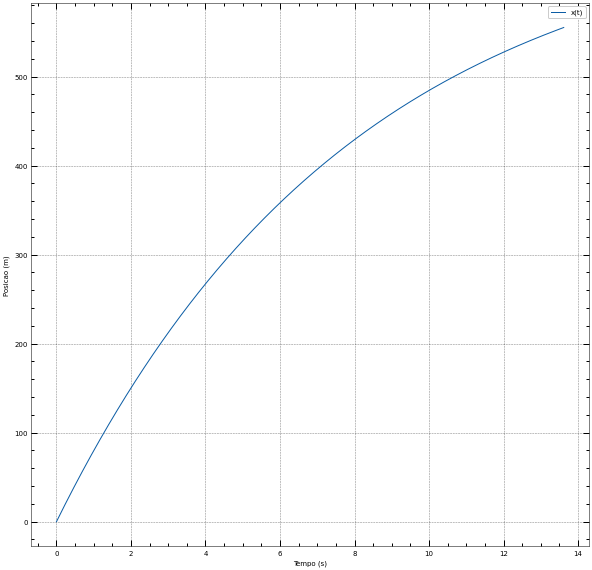

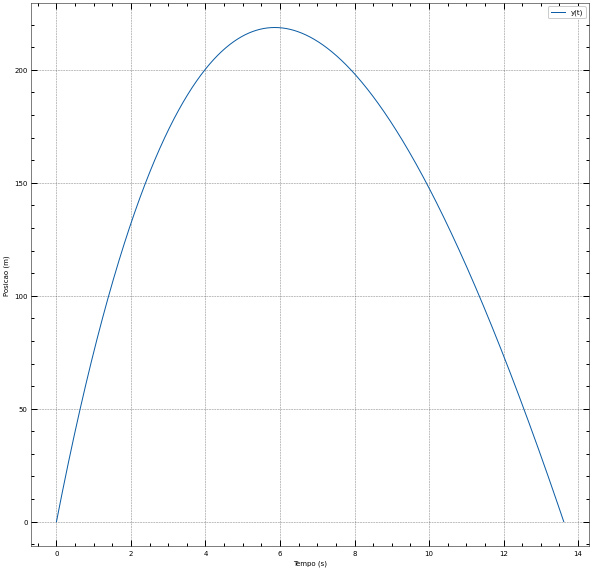

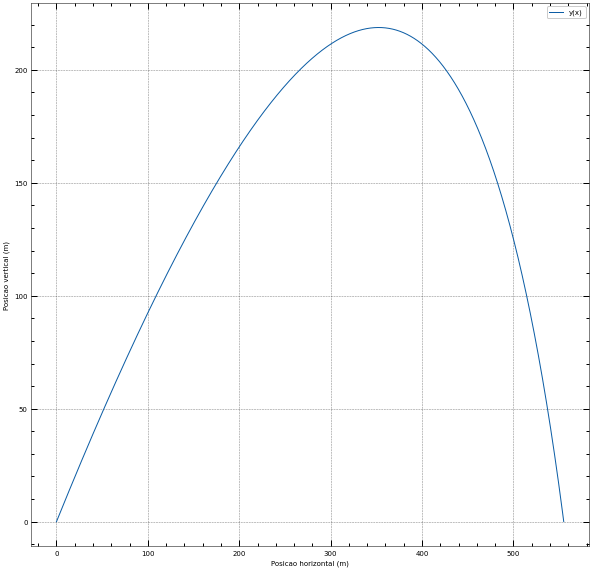

In [18]:
simulation_data = {
    'time': time,
    'x': x,
    'y': y
}

# save to xslx
pd.DataFrame(simulation_data).to_excel(
    'data/air_resistance/simulation_data.xlsx',
    index=False
)

with open('data/air_resistance/simulation_info.txt', 'w') as file:
    file.write('Simulacao de foguete com massa constante\n')
    file.write('\n')
    file.write('Massa: {}'.format(m))
    file.write('\n')
    file.write('Coeficiente de resistencia aerodinamica: {}'.format(b))
    file.write('\n')
    file.write('Aceleracao gravitacional: {}'.format(g))
    file.write('\n')
    file.write('\nVelocidade inicial: {}'.format(V_0))
    file.write('\nAngulo de lancamento: {}'.format(np.rad2deg(theta)))
    file.write('\n')
    file.write('Tempo de simulacao: {}'.format(simulation_time))
    file.write('\n')
    file.write('Passo de simulacao: {}'.format(simulation_step))
    file.write('\n')
    file.write('\n')
    file.write('Tempo necessario para alcancar o zero de y: {}'.format(time_to_reach_zero))
    file.write('\n')
    file.write('\n')
    file.write('Alcance vertical: {}'.format(vertical_range))
    file.write('\n')
    file.write('Alcance horizontal: {}'.format(horizontal_range))
    file.write('\n')
    file.write('\n')
    file.write('Alcance vertical teorico: {}'.format(theorical_vertical_range))
    file.write('\n')
    file.write('Alcance horizontal teorico: {}'.format(theorical_horizontal_range))
    file.write('\n')
    file.close()

# # # # Plots # # # #

fig1, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(time[:y_zero_index], x[:y_zero_index], label='x(t)')

axs.legend()

axs.set_xlabel('Tempo (s)')
axs.set_ylabel('Posicao (m)')

plt.savefig('images/air_resistance/sim_x_t.png', dpi=300)

fig2, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(time[:y_zero_index], y[:y_zero_index], label='y(t)')
axs.legend()

axs.set_xlabel('Tempo (s)')
axs.set_ylabel('Posicao (m)')

plt.savefig('images/air_resistance/sim_y_t.png', dpi=300)

fig3, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(x[:y_zero_index], y[:y_zero_index], label='y(x)')
axs.set_xlabel('Posicao horizontal (m)')
axs.set_ylabel('Posicao vertical (m)')
axs.legend(['y(x)'])

plt.savefig('images/air_resistance/sim_y_x.png', dpi=300)